1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas.io.data import DataReader
#allow us to read stock info from either google or yahoo finance. 

/Users/owner/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
#this sets the end time to today for the graph. 

start = datetime(end.year-1,end.month,end.day)
#start time is set to today, minus one year. Which starts exactly a year ago. 

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    #                  DataReader(ticker symbol, website, start and stop)
    #globals()[stock] sets the stock ticker as its own global variable. See below. 

In [9]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.474523
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.508268
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.350769
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.849671


In [10]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027
2016-01-05,746.450012,752.000000,738.640015,742.580017,1950700,742.580017
2016-01-06,730.000000,747.179993,728.919983,743.619995,1947000,743.619995
2016-01-07,730.309998,738.500000,719.059998,726.390015,2963700,726.390015
2016-01-08,731.450012,733.229980,713.000000,714.469971,2450900,714.469971


In [11]:
AAPL.describe()
#adj close price is what most people use. 

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.507778,105.427183,103.690278,104.604008,3.838384e+07,103.597547
std,7.586133,7.554376,7.680722,7.640743,1.709904e+07,8.033139
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.295000,98.205000,96.542502,97.137499,2.695660e+07,95.808918
50%,105.494999,106.279999,104.824997,105.750000,3.368495e+07,104.201492
75%,110.382502,111.562502,109.670002,110.977499,4.451040e+07,110.293901
max,118.180000,118.690002,117.449997,118.250000,1.333697e+08,117.645979


In [12]:
AAPL.info()
#This kicks back gerenal info about the stock.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


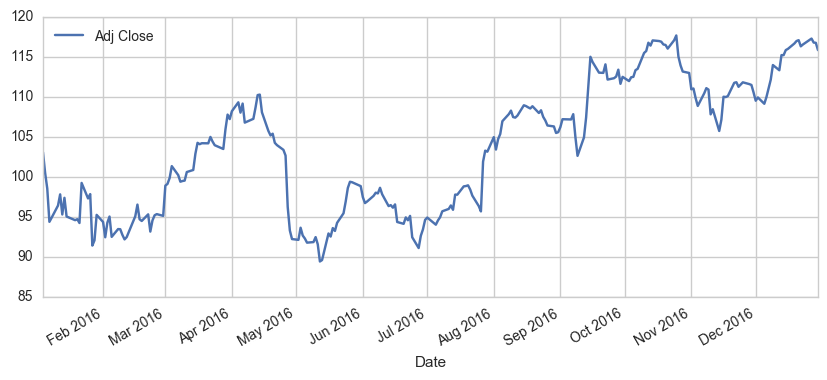

In [13]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))
#this plots the adjusted closing price of AAPL. 
#legend is shown
#figsize dictates the size of the graph. 

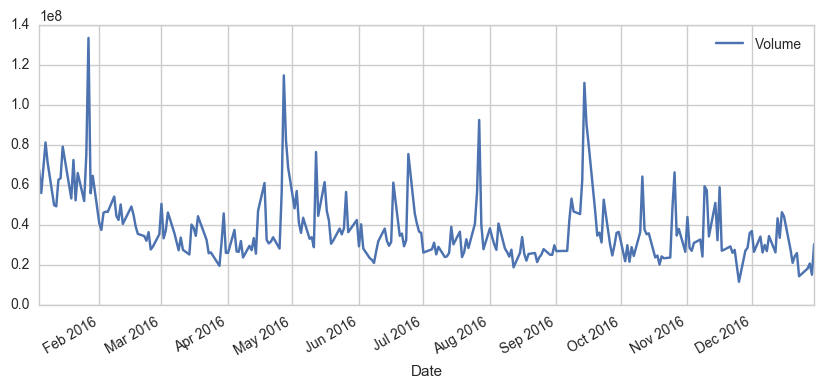

In [14]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))
#volume traded each day. 

In [126]:
#link to Investopedia explanation of 'moving averages.'
url = 'http://www.investopedia.com/terms/s/sma.asp'
import webbrowser
webbrowser.open(url)

True

In [16]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)
    #rolling_mean(APPL[column name],number of days) <<< takes two inputs.
    

/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


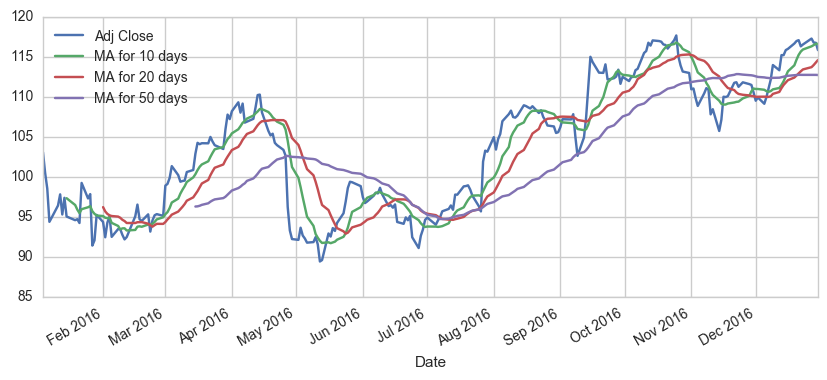

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
#subplots makes multiple graphs.
#the first 4 '' are values that are being plotted. 

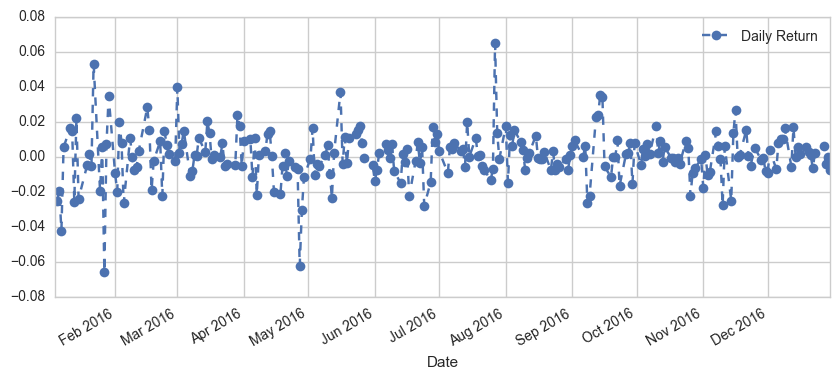

In [18]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')
#plots the return per day of the stock.

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


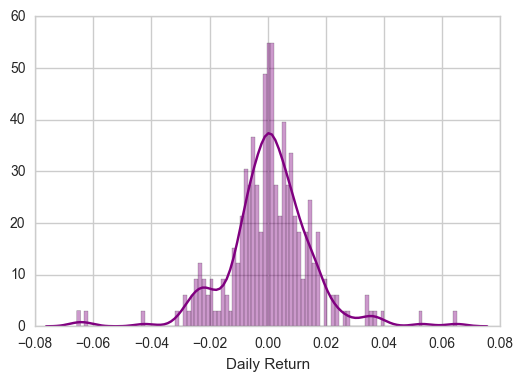

In [19]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')
#histogram of the same info. Very interesting. 

#seaborn version of a histogram.

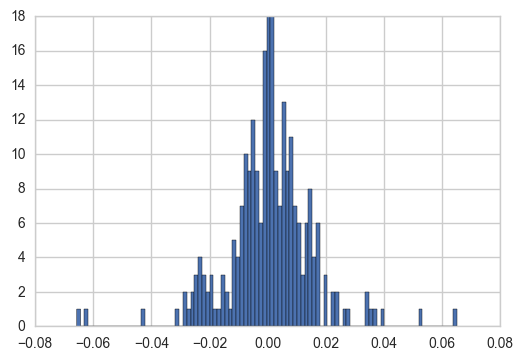

In [20]:
AAPL['Daily Return'].hist(bins=100)

#pandas version of a histogram. 

In [21]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
#Created a new dataframe. From tech_list, using yahoo to gather info.
#start and end dates.
#only wanting the 'Adj Close' price. 

In [22]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,103.057063,636.989990,741.840027,53.336436
2016-01-05,100.474523,633.789978,742.580017,53.579760
2016-01-06,98.508268,632.650024,743.619995,52.606467
2016-01-07,94.350769,607.940002,726.390015,50.776676
2016-01-08,94.849671,607.049988,714.469971,50.932406


In [23]:
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067


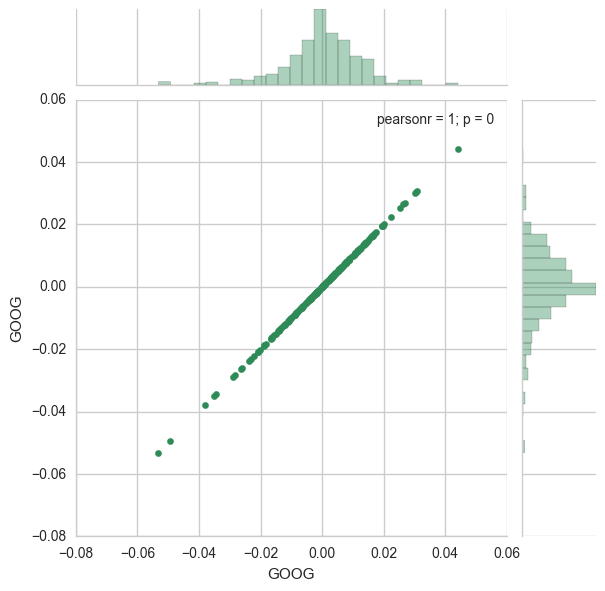

In [25]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color = 'seagreen')
#this style of plot will show if two stocks are correlated or not. 

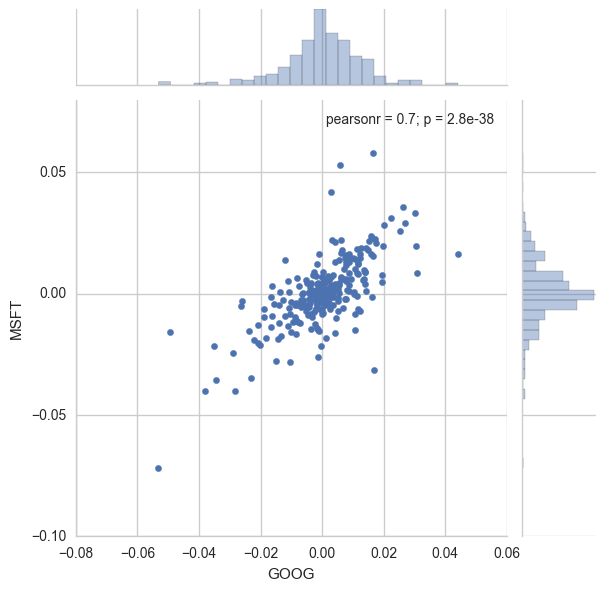

In [26]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

#the correlation between google and msft is less than before. 

In [27]:
url2 = 'http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient'
webbrowser.open(url2)
    
#Pearson R value

True

In [28]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067


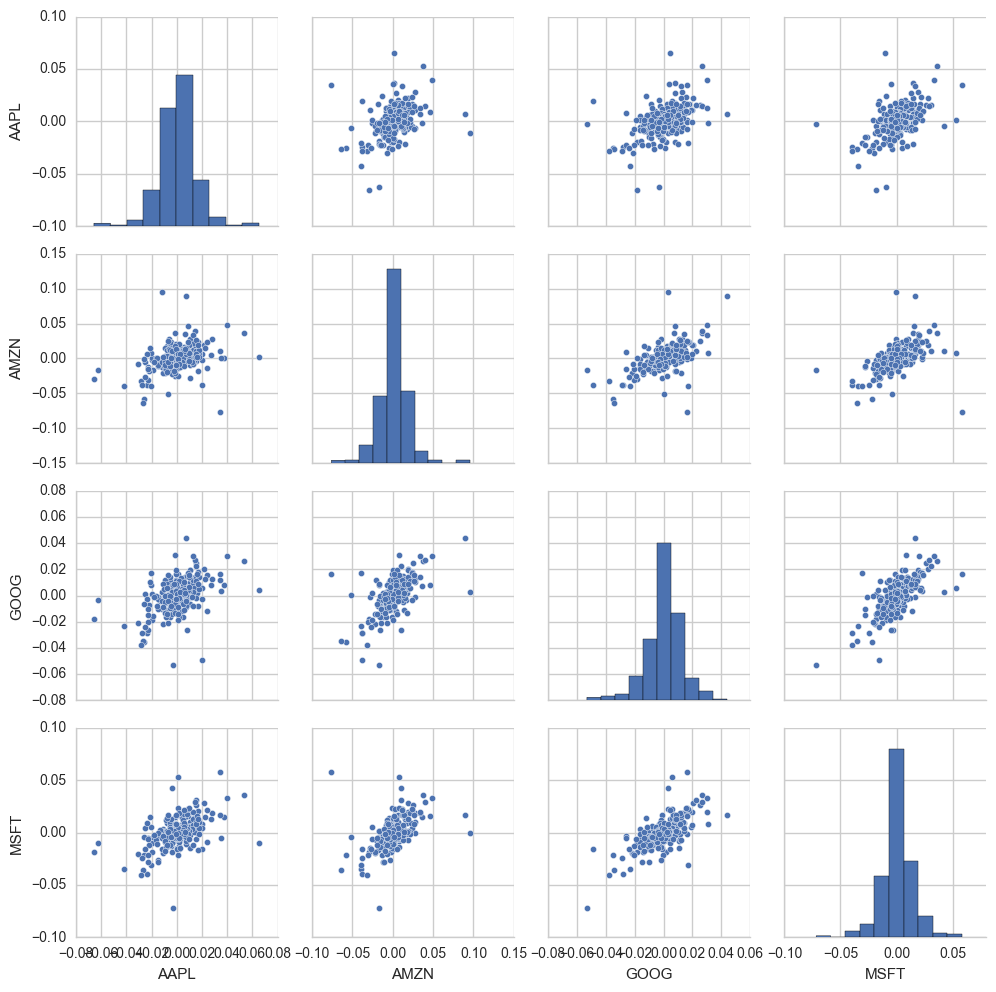

In [29]:
sns.pairplot(tech_rets.dropna())

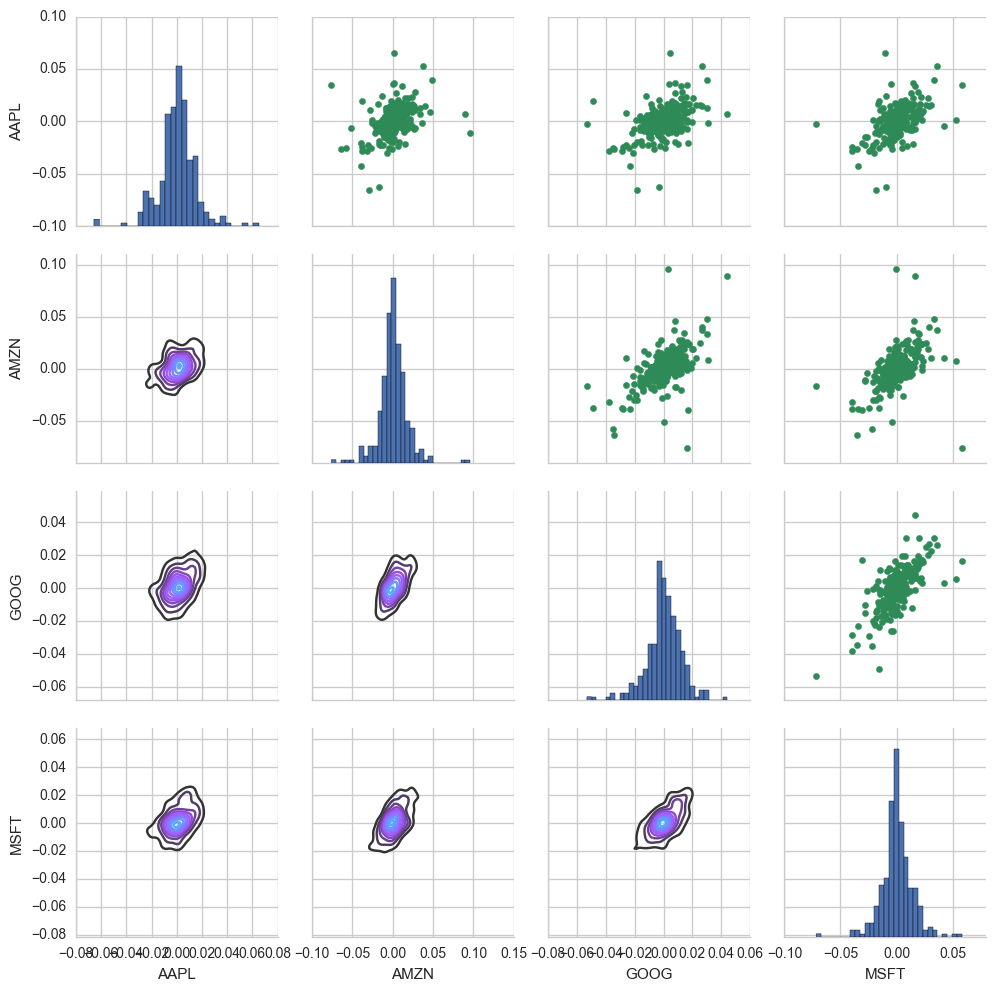

In [30]:
returns_fig = sns.PairGrid(tech_rets.dropna())
#sns.PairGrid(dataframe.dropna())

returns_fig.map_upper(plt.scatter,color='seagreen')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

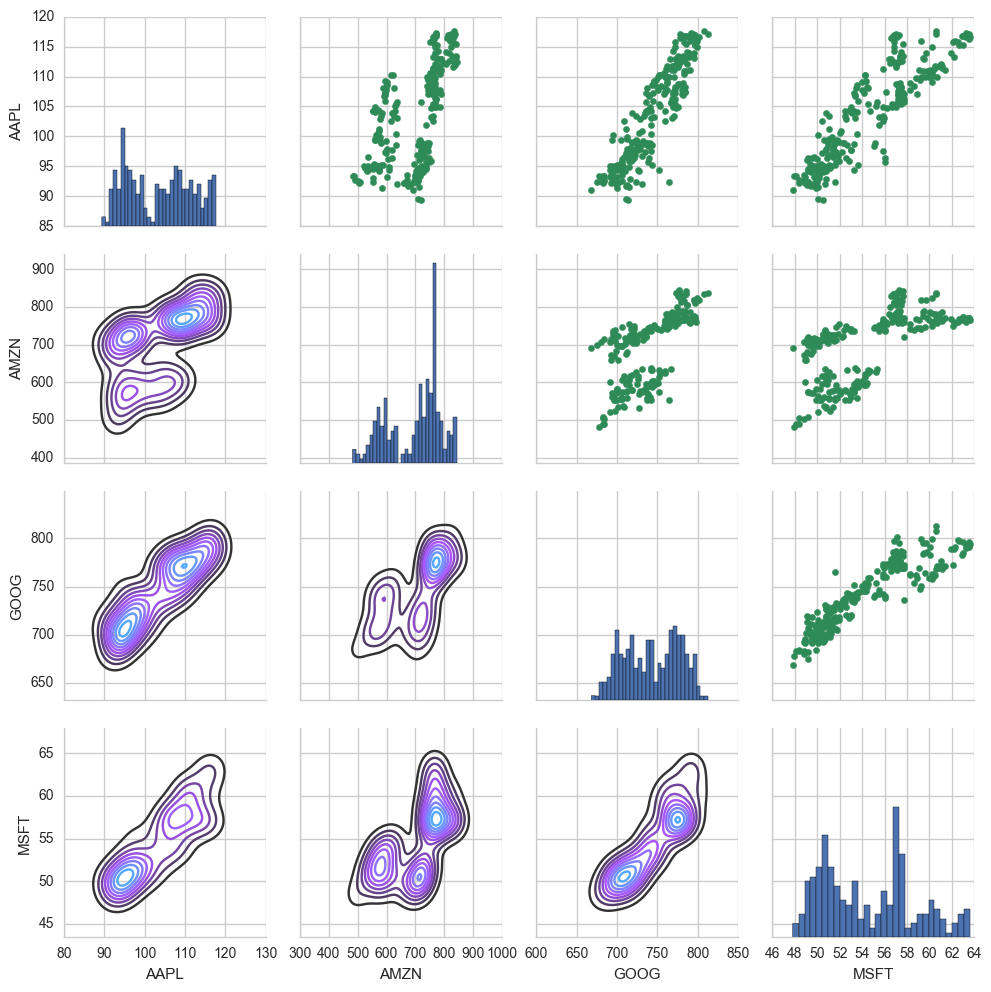

In [31]:
returns_fig = sns.PairGrid(closing_df.dropna())
#changing the dataframe from 'tech_rets' to 'closing_df'

returns_fig.map_upper(plt.scatter,color='seagreen')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [32]:
sns.corrplot(tech_rets.dropna(),annot=True)
#the command sns.corrplot(tech_rets.dropna(),annot=True). 
# intead, try sns.heatmap(tech_rets.dropna().corr())

AttributeError: module 'seaborn' has no attribute 'corrplot'

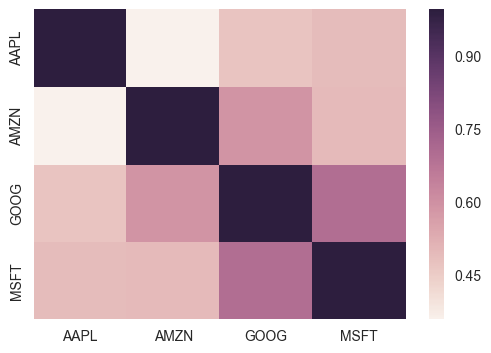

In [33]:
sns.heatmap(tech_rets.dropna().corr())

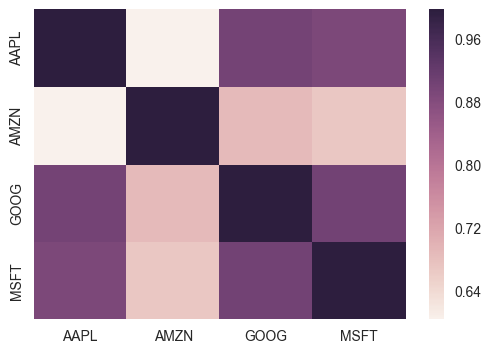

In [34]:
sns.heatmap(closing_df.corr())

In [35]:
rets = tech_rets.dropna()

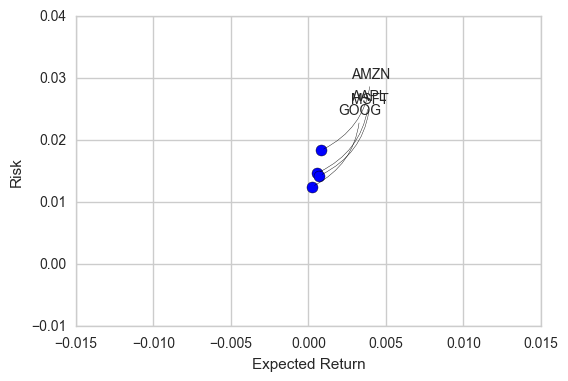

In [36]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha= 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    
    #ideally, the point should be as low and right as possible.

In [132]:
urll = 'https://en.wikipedia.org/wiki/Quantile'
import webbrowser
webbrowser.open(urll)

#dont put the 'urll' in the () in quotes. It won't open that way.

True

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


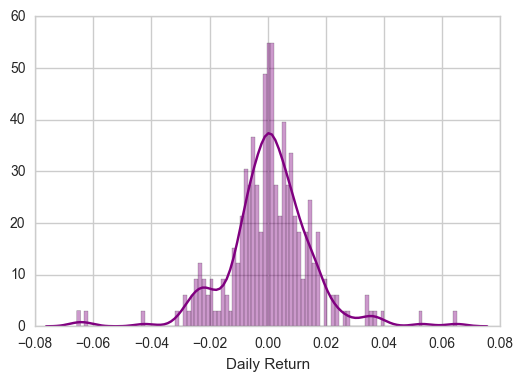

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
#'Return' not 'Returns'

In [39]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067
2016-01-11,0.016192,0.017610,0.002184,-0.000573


In [40]:
rets['AAPL'].quantile(0.05)

-0.023107282341668645

In [41]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
        
    return price

In [43]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027
2016-01-05,746.450012,752.000000,738.640015,742.580017,1950700,742.580017
2016-01-06,730.000000,747.179993,728.919983,743.619995,1947000,743.619995
2016-01-07,730.309998,738.500000,719.059998,726.390015,2963700,726.390015
2016-01-08,731.450012,733.229980,713.000000,714.469971,2450900,714.469971


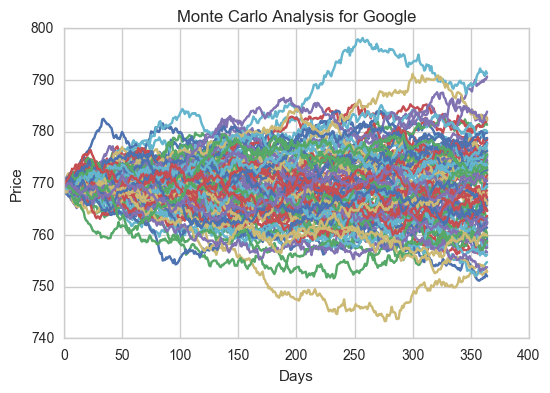

In [44]:
start_price = 769.50

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [45]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

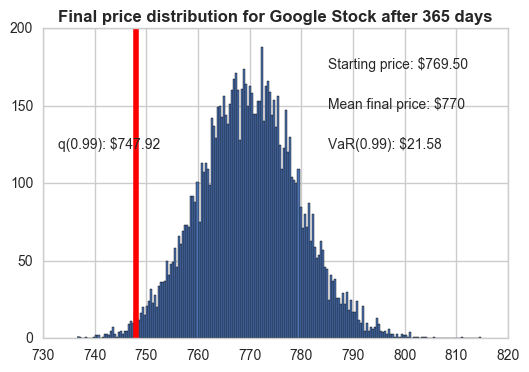

In [46]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins = 200)

# Starting Price
plt.figtext(0.6,0.8, s = 'Starting price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%2.f' % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' % q)

#Plot a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color = 'r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = 'bold');


In [ ]:
# 1. Estimate the value at risk using both methods we learned in this project for a stock not related to technology.

In [ ]:
# 2. Build a practice portfolio and see how well you can predict risk values with real stock information.

In [ ]:
# 3. Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices. 

In [74]:
comm_list = ['SGOL', 'PPLT', 'SIVR', 'DBC']
#made a new list with different stocks

In [75]:
for stock in comm_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    #                  DataReader(ticker symbol, website, start and stop)
    #globals()[stock] sets the stock ticker as its own global variable. See below. 

In [76]:
SGOL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.080002,105.690002,104.540001,104.900002,31400,104.900002
2016-01-05,105.199997,105.540001,105.059998,105.209999,15100,105.209999
2016-01-06,106.389999,106.820000,106.070000,106.680000,30500,106.680000
2016-01-07,107.879997,108.349998,107.459999,108.220001,70500,108.220001
2016-01-08,107.589996,107.809998,107.150002,107.709999,23000,107.709999


In [77]:
PPLT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,85.879997,86.040001,84.919998,85.290001,13300,85.290001
2016-01-05,86.000000,86.190002,85.599998,85.709999,8600,85.709999
2016-01-06,84.599998,85.050003,84.309998,84.849998,9500,84.849998
2016-01-07,84.250000,84.900002,83.699997,84.820000,23700,84.820000
2016-01-08,85.050003,85.199997,84.599998,85.000000,10600,85.000000


In [78]:
SIVR.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,13.85,13.92,13.56,13.56,71000,13.56
2016-01-05,13.71,13.76,13.65,13.71,55600,13.71
2016-01-06,13.81,13.88,13.68,13.76,38300,13.76
2016-01-07,13.88,14.11,13.80,14.03,89800,14.03
2016-01-08,13.83,13.83,13.65,13.70,76000,13.70


In [79]:
DBC.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,13.42,13.51,13.19,13.26,2307600,13.26
2016-01-05,13.22,13.25,13.13,13.13,1210000,13.13
2016-01-06,12.96,13.06,12.88,12.92,2668600,12.92
2016-01-07,12.79,12.98,12.76,12.86,10692400,12.86
2016-01-08,12.87,12.88,12.76,12.80,2809600,12.80


In [56]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-05,-0.025059,-0.005024,0.000998,0.004562
2016-01-06,-0.019570,-0.001799,0.001400,-0.018165
2016-01-07,-0.042205,-0.039058,-0.023170,-0.034783
2016-01-08,0.005288,-0.001464,-0.016410,0.003067
2016-01-11,0.016192,0.017610,0.002184,-0.000573


In [80]:
closing_df2 = DataReader(comm_list,'yahoo',start,end)['Adj Close']

In [81]:
closing_df2.head()
#

,DBC,PPLT,SGOL,SIVR
Date,,,,
2016-01-04,13.26,85.290001,104.900002,13.56
2016-01-05,13.13,85.709999,105.209999,13.71
2016-01-06,12.92,84.849998,106.680000,13.76
2016-01-07,12.86,84.820000,108.220001,14.03
2016-01-08,12.80,85.000000,107.709999,13.70


In [86]:
comm_rets = closing_df2.pct_change()
#created a new pct change for the new stocks. 

In [87]:
comm_rets.head()

,DBC,PPLT,SGOL,SIVR
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.009804,0.004924,0.002955,0.011062
2016-01-06,-0.015994,-0.010034,0.013972,0.003647
2016-01-07,-0.004644,-0.000354,0.014436,0.019622
2016-01-08,-0.004666,0.002122,-0.004713,-0.023521


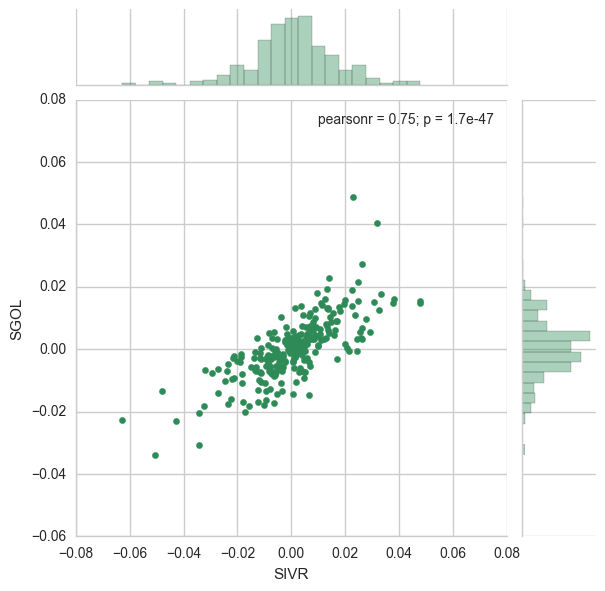

In [88]:
sns.jointplot('SIVR','SGOL',comm_rets,kind='scatter',color = 'seagreen')
#creating a jointplot with SLV vs XOM
#almost no correlation.

# 3. The correltion between gold and silver is quite strong. The two ETfs have a r value of .75, which is relatively strong. 
# 3. I would assume that these two stocks can predict each other quite well. 

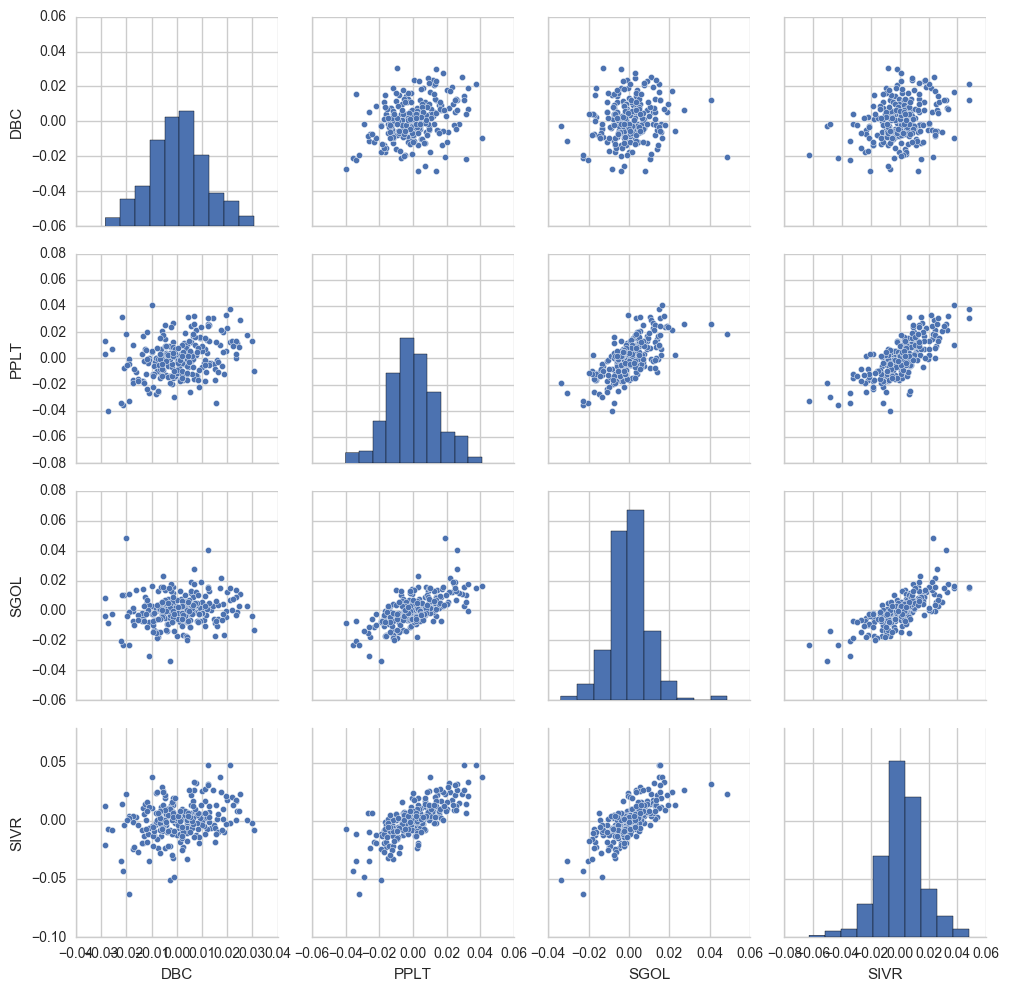

In [89]:
sns.pairplot(comm_rets.dropna())
#seems that DBC has no correlation with metal. 

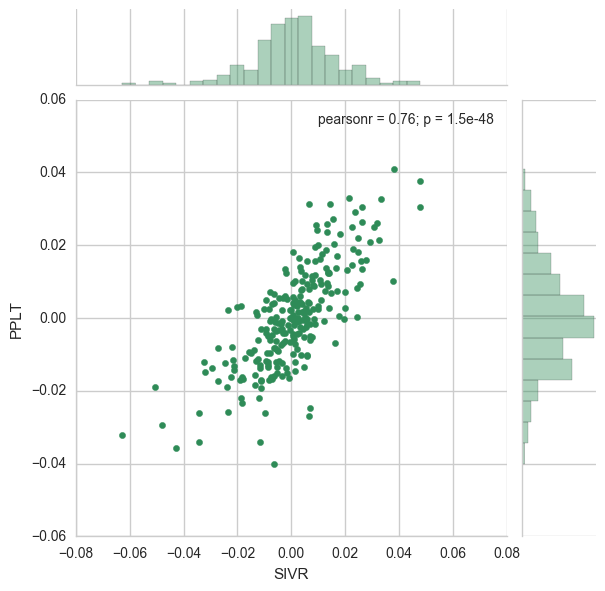

In [90]:
sns.jointplot('SIVR','PPLT',comm_rets,kind='scatter',color = 'seagreen')

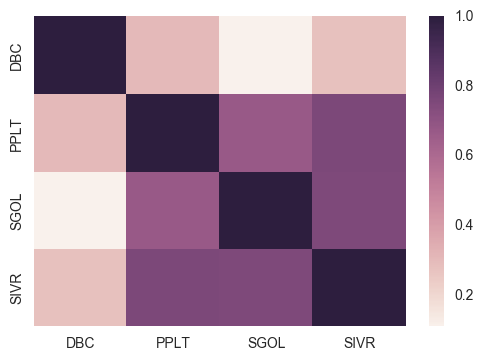

In [91]:
sns.heatmap(comm_rets.dropna().corr())
#correlation is strongest with metals than with the commodities ETF. 

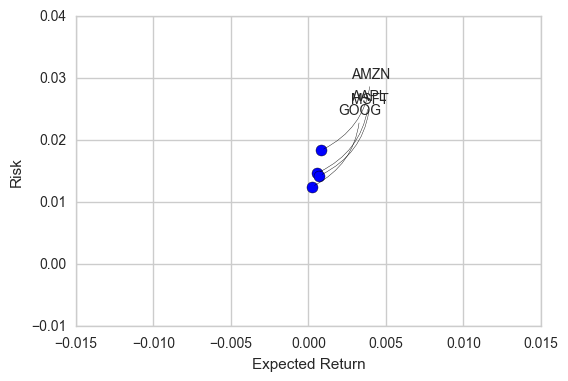

In [133]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha= 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
    
    #ideally, the point should be as low and right as possible.

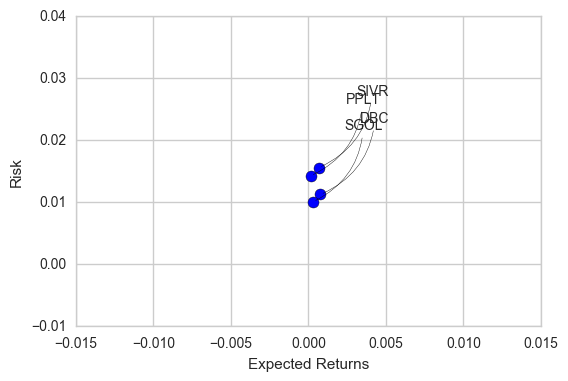

In [134]:
area = np.pi*20

plt.scatter(comm_rets.mean(),comm_rets.std(),s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#http://matplotlib.org/user/annotations_guide.html

for label, x, y in zip(comm_rets.columns, comm_rets.mean(), comm_rets.std()):
    plt.annotate(
    label,
    xy = (x, y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))
    
    #ideally, the point should be as low and right as possible.
    
# 1. This is a good representation of value and risk. Though it is a bit broad, it still gives a good reading. 
    
# 2. This Scatter plot is a good representation of a mock portfolio that compares risk to return. 
# 2. Seems that the commodity index DBC is about as stable and profitable as Gold. Silver and Platinum are slightly 
# more rsiky with no added return. 



Analysis of DBC, a commodity ETF

In [142]:
DBC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [143]:
DBC.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,14.292698,14.385675,14.202976,14.298770,2.399876e+06,14.298770
std,1.030461,1.019930,1.036194,1.028553,1.738245e+06,1.028553
min,11.790000,11.910000,11.700000,11.880000,6.946000e+05,11.880000
25%,13.480000,13.552500,13.395000,13.440000,1.443425e+06,13.440000
50%,14.595000,14.670000,14.495000,14.585000,1.900050e+06,14.585000
75%,15.102500,15.180000,14.972500,15.100000,2.751875e+06,15.100000
max,15.820000,15.890000,15.790000,15.840000,1.325950e+07,15.840000


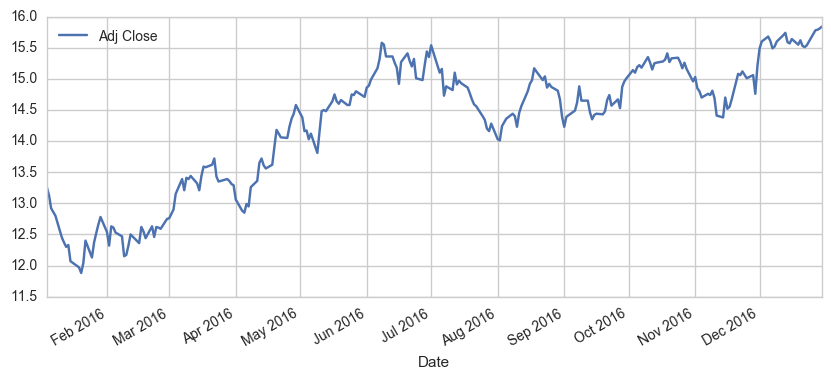

In [144]:
DBC['Adj Close'].plot(legend=True,figsize=(10,4))

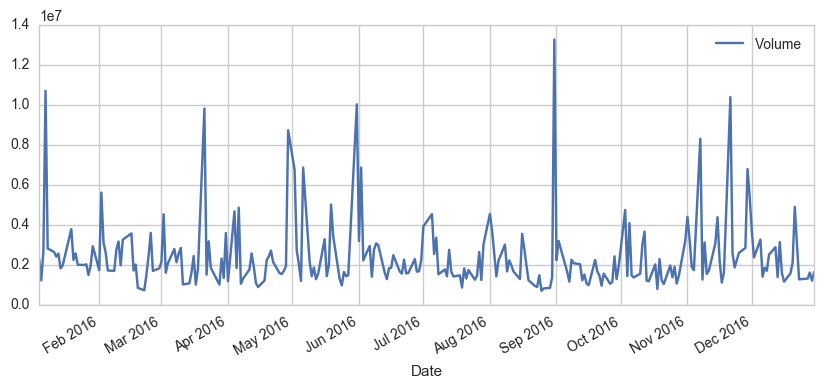

In [145]:
DBC['Volume'].plot(legend=True,figsize=(10,4))

In [146]:
moav_day = [10,20,50]

for ma in moav_day:
    column_name = 'MA for %s days' %(str(ma))
    
    DBC[column_name] = pd.rolling_mean(DBC['Adj Close'],ma)

/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/Users/owner/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


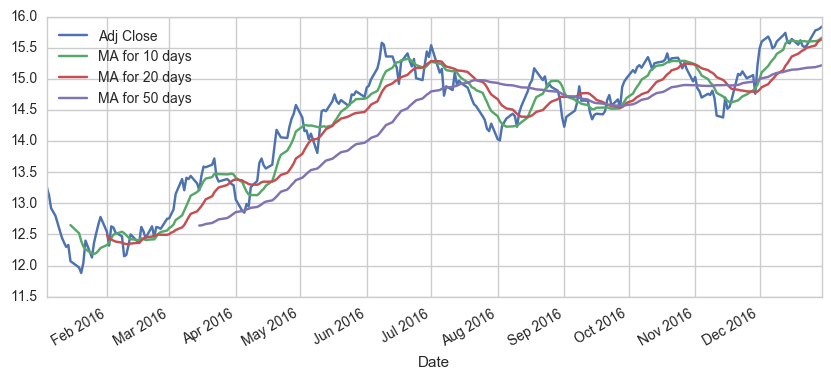

In [147]:
DBC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

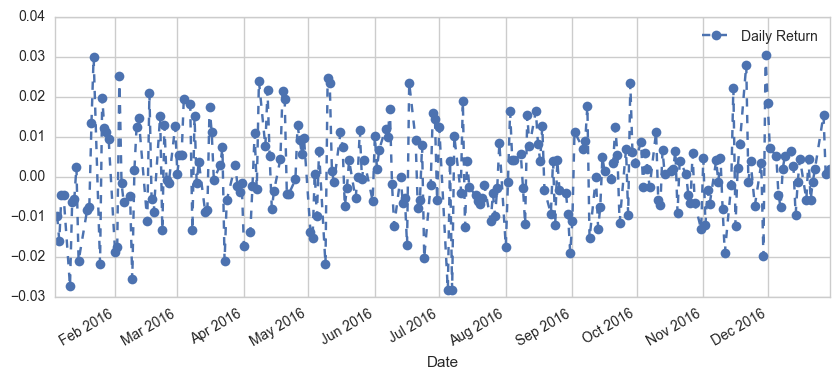

In [150]:
DBC['Daily Return'] = DBC['Adj Close'].pct_change()

DBC['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/owner/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


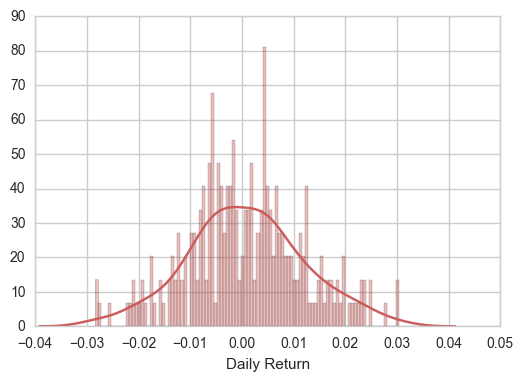

In [154]:
sns.distplot(DBC['Daily Return'].dropna(),bins=100,color = 'indianred')

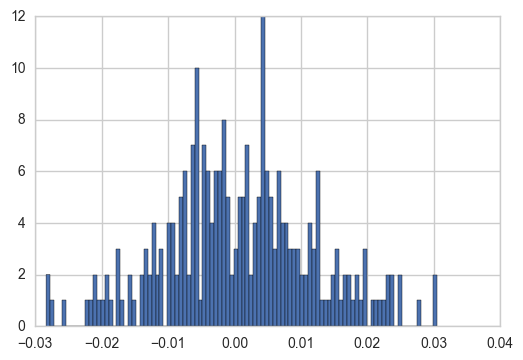

In [153]:
DBC['Daily Return'].hist(bins=100)

In [158]:
comm_rets['DBC'].quantile(0.05)

/Users/owner/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


nan

In [159]:
days = 365

dt = 1/days

mu = comm_rets.mean()['DBC']

sigma = comm_rets.std()['DBC']

In [160]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu*dt,scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
        
    return price

In [161]:
DBC.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2016-01-04,13.42,13.51,13.19,13.26,2307600,13.26,NaN,NaN,NaN,NaN
2016-01-05,13.22,13.25,13.13,13.13,1210000,13.13,NaN,NaN,NaN,-0.009804
2016-01-06,12.96,13.06,12.88,12.92,2668600,12.92,NaN,NaN,NaN,-0.015994
2016-01-07,12.79,12.98,12.76,12.86,10692400,12.86,NaN,NaN,NaN,-0.004644
2016-01-08,12.87,12.88,12.76,12.80,2809600,12.80,NaN,NaN,NaN,-0.004666


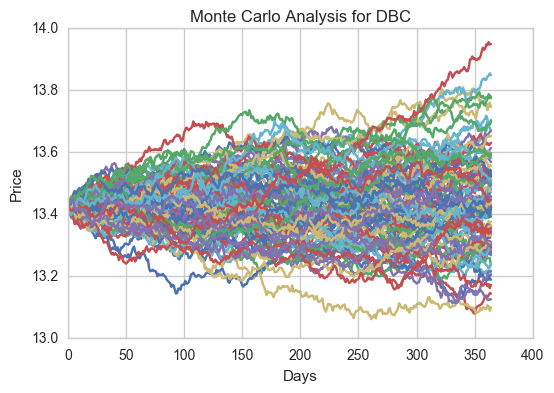

In [162]:
start_price = 13.42

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for DBC')

# 1. This graph shows a random variety for the stock DBC with price to days. Price does not seem to adjust too much. 
# This is a fairly safe investment. 

In [163]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

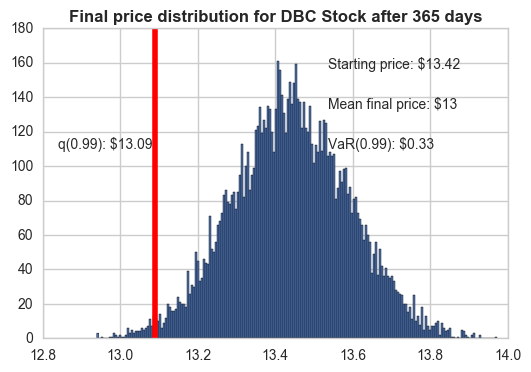

In [164]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins = 200)

#Starting Price
plt.figtext(0.6, 0.8, s = 'Starting price: $%.2f' %start_price)
#Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%2.f' % simulation.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

#Display 1% quatile
plt.figtext(0.15,0.6, 'q(0.99): $%.2f' % q)

#Plot a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color ='r')

#Title
plt.title(u"Final price distribution for DBC Stock after %s days" % days, weight = 'bold');

#1. This plot gives a solid visualization of Value at risk for the DBC index. The stock seems to be quite safe.  